# EDA-1. Введение в разведывательный анализ данных. Алгоритмы и методы EDA

## 4. Знакомство с данными: винные обзоры

После просмотра документального фильма о сомелье вы захотели создать прогностическую модель для оценки вин вслепую, как это делает сомелье.  

Определив бизнес-задачу, вы перешли к сбору данных для обучения модели. После нескольких недель парсинга сайта WineEnthusiast вам удалось собрать около 130 тысяч строк обзоров вин для анализа и обучения.  

Вот какие признаки вам удалось собрать:  

country — страна-производитель вина.  

description — подробное описание.  

designation — название виноградника, где выращивают виноград для вина.  

points — баллы, которыми WineEnthusiast оценил вино по шкале от 1 до 100.  

price — стоимость бутылки вина.  

province — провинция или штат.  

region_1 — винодельческий район в провинции или штате (например Напа).  

region_2 — конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например Резерфорд в долине Напа), но это значение может быть пустым.  

taster_name — имя сомелье.  

taster_twitter_handle — твиттер сомелье.  

title — название вина, которое часто содержит год и другую подробную информацию.  

variety — сорт винограда, из которого изготовлено вино (например Пино Нуар).  

winery — винодельня, которая производила вино.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитаем наш файл с винными обзорами:
original_data = pd.read_csv('data/wine.csv')
data = original_data.copy()

In [3]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### Задание 4.1

Сколько всего дегустаторов приняло участие в винных обзорах?

In [4]:
data['taster_name'].nunique()

19

### Задание 4.2

Какова максимальная цена за бутылку в этом наборе данных? Введите целое число.

In [5]:
data['price'].max()

3300.0

### Задание 5.2

Проанализируйте представленный датасет и перечислите все числовые признаки через запятую.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


### Задание 5.3

Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их.

В поле ниже введите, сколько дублирующихся записей вам удалось обнаружить.

In [7]:
data.shape[0]

129971

In [8]:
original_shape = data.shape[0]
dupl_columns = list(data.columns)

data = data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {original_shape - data.shape[0]}')

Результирующее число записей: 9983


### Задание 5.4

Проверьте датасет на наличие пропусков в данных.

В каких признаках были обнаружены пропуски?

In [9]:
cols_null = data.isnull().sum()
cols_with_null = cols_null[cols_null>0].sort_values(ascending=False)
display(cols_with_null)

region_2                 73219
designation              34545
taster_twitter_handle    29446
taster_name              24917
region_1                 19560
price                     8395
country                     59
province                    59
variety                      1
dtype: int64

### Задание 5.5

Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в модуле PYTHON-14. Очистка данных.

Воспользуйтесь правилами:

* Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных.  
* Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.  
* Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.  

<AxesSubplot: >

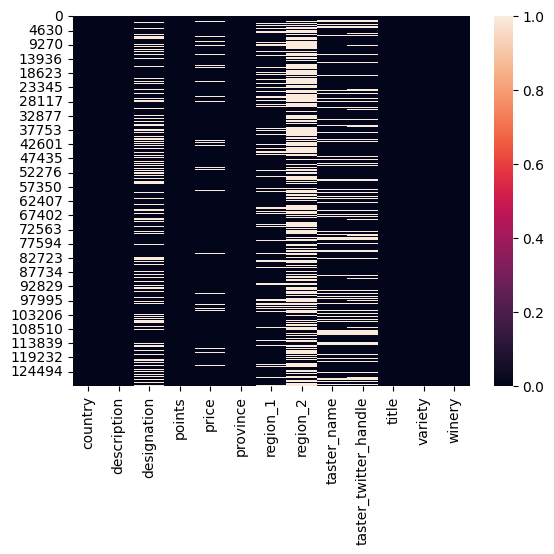

In [10]:
sns.heatmap(data.isnull()) # опеределяем объем пропусков

In [11]:
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
data = data.dropna(thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = data.shape[1] #число признаков после удаления столбцов
data = data.dropna(thresh=m-2, axis=0)

#заменяем пропуски на индикаторы: для строковых на 'unknown', для числовых на -1
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'country': 'unknown',
    'description': 'unknown',
    'designation': 'unknown',
    'points': -1,
    'price': -1,
    'province': 'unknown',
    'region_1': 'unknown',
    'region_2': 'unknown',
    'taster_name': 'unknown',
    'taster_twitter_handle': 'unknown',
    'title': 'unknown',
    'variety': 'unknown',
    'winery': 'unknown',
}
#заполняем пропуски в соответствии с заявленным словарем
data = data.fillna(values)
#выводим результирующую долю пропусков
data.isnull().mean()

country                  0.0
description              0.0
designation              0.0
points                   0.0
price                    0.0
province                 0.0
region_1                 0.0
taster_name              0.0
taster_twitter_handle    0.0
title                    0.0
variety                  0.0
winery                   0.0
dtype: float64

<AxesSubplot: >

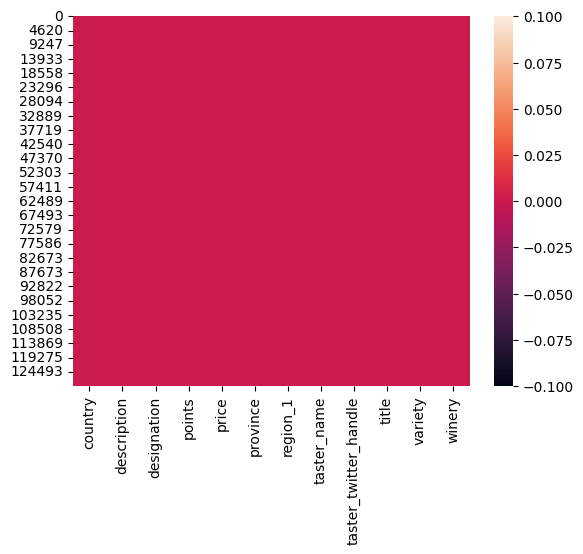

In [12]:
sns.heatmap(data.isnull())

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109833 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                109833 non-null  object 
 1   description            109833 non-null  object 
 2   designation            109833 non-null  object 
 3   points                 109833 non-null  int64  
 4   price                  109833 non-null  float64
 5   province               109833 non-null  object 
 6   region_1               109833 non-null  object 
 7   taster_name            109833 non-null  object 
 8   taster_twitter_handle  109833 non-null  object 
 9   title                  109833 non-null  object 
 10  variety                109833 non-null  object 
 11  winery                 109833 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 10.9+ MB


## 6. БОНУС. EDA одной строкой кода

В реальной жизни большую часть работы над моделью занимает разведывательный анализ данных. С целью решения подобной проблемы появились инструменты автоматической визуализации и представления датасета.  

К таким инструментам можно отнести следующие библиотеки Python, которые могут выполнять EDA всего одной строкой кода:

* d-tale; 
* ydata-profiling;  
* sweetviz.  

### YDATA-PROFILING

Ссылка на библиотеку https://github.com/ydataai/ydata-profiling

Ydata-profiling — это библиотека с открытым исходным кодом, которая создаёт подробный отчёт по данным. Ydata-profiling можно легко использовать для больших наборов данных: отчёты создаются всего за несколько секунд.

Примечание. Ранее библиотека ydata-profiling называлась pandas-profiling и работала только с pandas.DataFrame. Однако, начиная с версии 4.0.0, в библиотеке появилась возможность работать с форматами данных библиотеки Spark (библиотека для работы с распределёнными вычислениями на больших объёмах данных). В результате расширения возможностей библиотеки возникла необходимость ребрендинга, который и привёл к смене имени. Синтаксис и формат выходных данных для pandas остались теми же.

Установка (выполните в терминале или ячейке ноутбука):

pip install -U ydata-profiling
pip install ipywidgets

In [14]:
# %pip install -U ydata-profiling
# %pip install ipywidgets

### РАБОТА С YDATA-PROFILING НА ПРИМЕРЕ ВИННЫХ ОБЗОРОВ

Начните свою работу с загрузки датасета винных обзоров, с которым мы познакомились в Юните 5. Проверка.

In [15]:
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
# df = pd.read_csv('wine.csv')

Сгенерируйте отчёт одной строкой.

In [17]:
profile = ProfileReport(data, title="Pandas Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Примечание. Чтобы сохранить собственный отчёт в виде HTML-файла, вы можете воспользоваться методом to_file(), передав в него путь до файла, в который вы хотите сохранить результат:

In [18]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Результат отчёта ydata-profiling можно использовать для первичной визуализации набора данных, числового и статистического анализа переменных, с которым вы познакомитесь в следующих моделях по статистике. Также отчёт используется для вывода корреляции переменных, выявления пропущенных значений, а также для просмотра первых и последних строк набора данных.

Подробнее с возможностями библиотеки вы можете познакомиться в документации https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/overview.html.

### SWEETVIZ

Ссылка на библиотеку: https://github.com/fbdesignpro/sweetviz

Sweetviz — это библиотека автоматического анализа с открытым исходным кодом. Sweetviz также можно использовать для сравнения нескольких наборов данных и выводов по ним. Это может быть удобно, когда необходимо сравнить обучающий и тестовый наборы данных. Об этом вы узнаете далее в модулях про машинное обучение.

Установка:

In [19]:
%pip install sweetviz

     ---------------------------------------- 15.1/15.1 MB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


С помощью Sweetviz можно провести первичный осмотр набора данных, просмотреть свойства признаков, провести числовой и статистический однофакторный анализ и так далее.

### РАБОТА СО SWEETVIZ НА ПРИМЕРЕ ВИННЫХ ОБЗОРОВ


Начните свою работу с загрузки датасета винных обзоров.

In [20]:
import pandas as pd
import sweetviz as sv

# df = pd.read_csv('wine.csv')

Чтобы проанализировать набор данных, просто используйте функцию analyze(), а затем — show_html():

In [21]:
report = sv.analyze(data)
report.show_html()

c:\Users\artem.truschelev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\artem.truschelev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\artem.truschelev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
c:\Users\artem.truschelev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
c:\Users\artem.truschelev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
c:\Users\artem.truschelev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarni

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### D-TALE

Ссылка на библиотеку https://github.com/man-group/dtale

D-Tale — это библиотека с открытым исходным кодом. D-Tale делает подробный разведывательный анализ набора данных. Интересная особенность: библиотека предоставляет функцию экспорта кода для каждого графика или элемента анализа в отчёте.

Установка:

In [22]:
%pip install dtale

     ---------------------------------------- 14.0/14.0 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 62.3/62.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 642.7/642.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 840.9/840.9 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 45.9/45.9 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 96.5/96.5 kB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 99.8/99.8 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 219.7/219.7 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 8.3/8.3 

  DEPRECATION: dash-colorscales is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: future is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: dash-daq is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be

### РАБОТА С D-TALE НА ПРИМЕРЕ ВИННЫХ ОБЗОРОВ

Начните свою работу с загрузки датасета винных обзоров.

In [23]:
import pandas as pd
import dtale

# df = pd.read_csv('wine.csv')

Сгенерируйте отчёт одной строкой.

In [24]:
d = dtale.show(data)
d

### СРАВНЕНИЕ БИБЛИОТЕК

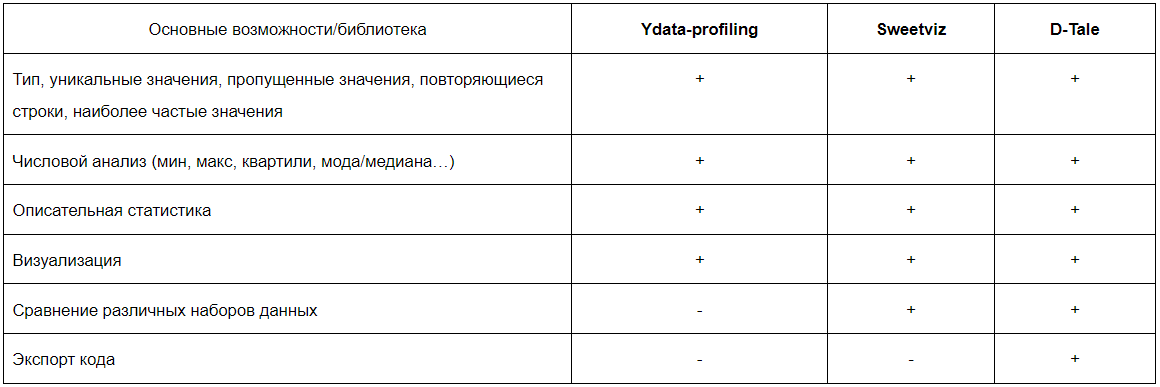

Совет. Мы советуем проводить самостоятельный разведывательный анализ данных, используя библиотеку pandas и писать код на Python, так как важно знать и применять основы EDA. Помните, что ни одна из перечисленных выше библиотек не сможет провести детальный анализ так, как это делает специалист по данным. Данные библиотеки можно использовать для ускорения вашей работы, первичной визуализации данных, например чтобы понять, с какими данными вам придётся работать.